## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice = len(data_df["Mouse ID"].unique())
print(f'There are {mice} mice.')

There are 249 mice.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated = study_results.duplicated(keep="first")
x = 0
y = 0
for value in duplicated:
    if value == True:
        y = x
    else:
        x = x+1
duplicate_mouse = study_results["Mouse ID"][y]
print(f'The duplicate mouse ID is {duplicate_mouse}.')

The duplicate mouse ID is g989.


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_df = data_df.loc[data_df["Mouse ID"] == duplicate_mouse, :]
dup_mouse_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
updated_df = data_df.loc[data_df["Mouse ID"] != duplicate_mouse, :]
updated_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mice2 = len(updated_df["Mouse ID"].unique())
print(f'There are now {mice2} mice.')

There are now 248 mice.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#mean
drug_df_mean = updated_df.groupby(["Drug Regimen"]).mean()
drug_mean = drug_df_mean["Tumor Volume (mm3)"]
#median
drug_df_median = updated_df.groupby(["Drug Regimen"]).median()
drug_median = drug_df_median["Tumor Volume (mm3)"]
#variance with ddof = 0 since this is a population
drug_df_var = updated_df.groupby(["Drug Regimen"]).var(ddof=0)
drug_var = drug_df_var["Tumor Volume (mm3)"]
#standard deviation with ddof = 0 since this is a population
drug_df_stdev = updated_df.groupby(["Drug Regimen"]).std(ddof=0)
drug_stdev = drug_df_stdev["Tumor Volume (mm3)"]
#standard error of the mean with ddof = 0 since this is a population
drug_df_sem = updated_df.groupby(["Drug Regimen"]).sem(ddof=0)
drug_sem = drug_df_sem["Tumor Volume (mm3)"]

#create data frame
drug_stats_df = pd.DataFrame({
    "Mean" : drug_mean,
    "Median" : drug_median,
    "Variance" : drug_var,
    "Standard Deviation" : drug_stdev,
    "SEM" : drug_sem
})
#print out data frame
drug_stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.328629
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.468499
Infubinol,52.884795,51.820584,42.886388,6.548770,0.490851
Ketapril,55.235638,53.698743,68.188930,8.257659,0.602252
Naftisol,54.331565,52.509285,65.817708,8.112811,0.594860
Placebo,54.033581,52.288934,60.830138,7.799368,0.579722
Propriva,52.320930,50.446266,43.555716,6.599675,0.542490
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320250
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.571526


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#using lambda method to change ddof to 0
updated_df.groupby(["Drug Regimen"]).agg({
    "Tumor Volume (mm3)": [np.mean, np.median, lambda x: np.var(x, ddof=0), 
                           lambda x: np.std(x, ddof=0), lambda x: st.sem(x, ddof=0) ]}).rename(columns={"mean":"Mean", "median":"Median", "<lambda_0>":"Variance", "<lambda_1>": "Standard Deviation", "<lambda_2>":"SEM"})


Tumor Volume (mm3)                                           \
                           Mean     Median   Variance Standard Deviation   
Drug Regimen                                                               
Capomulin             40.675741  41.557809  24.839296           4.983904   
Ceftamin              52.591172  51.776157  39.069446           6.250556   
Infubinol             52.884795  51.820584  42.886388           6.548770   
Ketapril              55.235638  53.698743  68.188930           8.257659   
Naftisol              54.331565  52.509285  65.817708           8.112811   
Placebo               54.033581  52.288934  60.830138           7.799368   
Propriva              52.320930  50.446266  43.555716           6.599675   
Ramicane              40.216745  40.673236  23.383692           4.835669   
Stelasyn              54.233149  52.431737  59.122106           7.689090   
Zoniferol             53.236507  51.818479  48.266689           6.947423   

                        
                   SEM  
Drug Regimen            
Capomulin     0.328629  
Ceftamin      0.468499  
Infubinol     0.490851  
Ketapril      0.602252  
Naftisol      0.594860  
Placebo       0.579722  
Propriva      0.542490  
Ramicane      0.320250  
Stelasyn      0.571526  
Zoniferol     0.514977

## Bar and Pie Charts

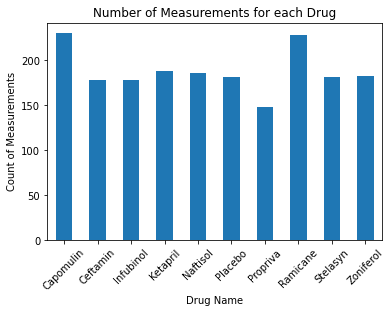

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
counts_df = updated_df.groupby(["Drug Regimen"]).count()["Timepoint"]
counts_df.plot(kind="bar", rot=45, title="Number of Measurements for each Drug")
plt.xlabel("Drug Name")
plt.ylabel("Count of Measurements")
plt.show()

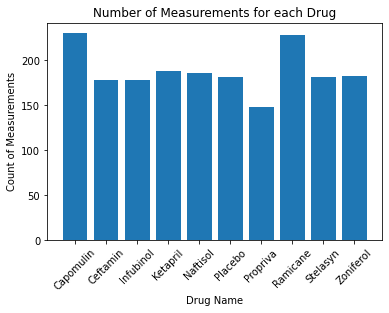

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_names = list(counts_df.index)
x_axis = np.arange(len(drug_names))
measurements = updated_df.groupby(["Drug Regimen"]).count()["Timepoint"]
plt.bar(x_axis, measurements, align="center")
plt.xticks(x_axis, drug_names, rotation=45)
plt.xlabel("Drug Name")
plt.ylabel("Count of Measurements")
plt.title("Number of Measurements for each Drug")
plt.show()

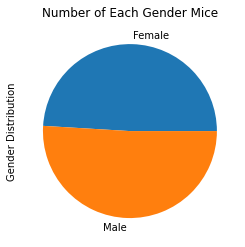

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = updated_df.groupby(["Sex"]).count()["Timepoint"]
gender_df.plot(kind="pie", title="Number of Each Gender Mice")
plt.ylabel("Gender Distribution")
plt.show()


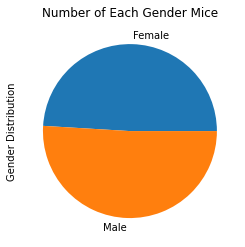

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = list(gender_df.index)
sizes = updated_df.groupby(["Sex"]).count()["Timepoint"]
plt.pie(sizes, labels=labels)
plt.title("Number of Each Gender Mice")
plt.ylabel("Gender Distribution")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_last_timepoint = updated_df.groupby(["Mouse ID"]).max()["Timepoint"]
    
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
time_df = pd.merge(mouse_metadata, mouse_last_timepoint, on="Mouse ID")
final_time_df = pd.merge(time_df, study_results,  how='left', on=["Mouse ID", "Timepoint"])

final_time_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [28]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Capomulin_data = []
Ramicane_data = []
Infubinol_data = []
Ceftamin_data = []
outliers = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    #pull data for requested drug
    dataframe = final_time_df.loc[final_time_df["Drug Regimen"] == treatment, :]
    #turn volume of tumor data into a list
    datalist = dataframe["Tumor Volume (mm3)"]
    #calcuate quartiles
    quartiles = datalist.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    mean = quartiles[.5]
    #calcuate iqr and bound
    iqr = upperq-lowerq
    lower_bound = lowerq-(1.5*iqr)
    upper_bound = upperq+(1.5*iqr)
    #create list of outliers
    outliers = datalist.loc[(datalist<lower_bound) | (datalist>upper_bound)]
    #print quartile data
    print("---------------")
    print(f'For {treatment}:')
    print(f'Lower quartile: {round(lowerq,2)}')
    print(f'Upper quartile: {round(upperq,2)}')
    print(f'Mean: {round(mean,2)}')
    print(f'IQR: {round(iqr,2)}')
    print(f'Lower Bound: {round(lower_bound,2)}')
    print(f'Upper Bound: {round(upper_bound,2)}')
    #print outliers
    if outliers.empty:
        print(f'There are no outliers for {treatment}.')
    else:
        print(f'The outlier(s) for {treatment}: {round(outliers.item(),2)}')
    

---------------
For Capomulin:
Lower quartile: 32.38
Upper quartile: 40.16
Mean: 38.13
IQR: 7.78
Lower Bound: 20.7
Upper Bound: 51.83
There are no outliers for Capomulin.
---------------
For Ramicane:
Lower quartile: 31.56
Upper quartile: 40.66
Mean: 36.56
IQR: 9.1
Lower Bound: 17.91
Upper Bound: 54.31
There are no outliers for Ramicane.
---------------
For Infubinol:
Lower quartile: 54.05
Upper quartile: 65.53
Mean: 60.17
IQR: 11.48
Lower Bound: 36.83
Upper Bound: 82.74
The outlier(s) for Infubinol: 36.32
---------------
For Ceftamin:
Lower quartile: 48.72
Upper quartile: 64.3
Mean: 59.85
IQR: 15.58
Lower Bound: 25.36
Upper Bound: 87.67
There are no outliers for Ceftamin.


In [29]:
#data for box and whishers plot
Capomulin_vol_data = final_time_df.loc[final_time_df["Drug Regimen"] == "Capomulin", :]
Capomulin = Capomulin_vol_data["Tumor Volume (mm3)"]
Ramicane_vol_Data = final_time_df.loc[final_time_df["Drug Regimen"] == "Ramicane", :]
Ramicane = Ramicane_vol_Data["Tumor Volume (mm3)"]
Infubinol_vol_Data = final_time_df.loc[final_time_df["Drug Regimen"] == "Infubinol", :]
Infubinol = Infubinol_vol_Data["Tumor Volume (mm3)"]
Ceftamin_vol_Data = final_time_df.loc[final_time_df["Drug Regimen"] == "Ceftamin", :]
Ceftamin = Ceftamin_vol_Data["Tumor Volume (mm3)"]

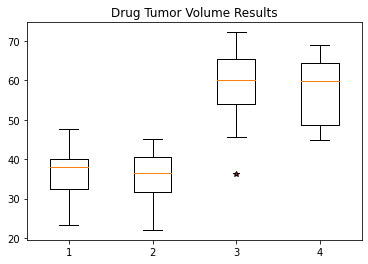

In [47]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
treatment_data = [Capomulin, Ramicane, Infubinol, Ceftamin]
fig, ax = plt.subplots()
ax.set_title('Drug Tumor Volume Results')
ax.boxplot(treatment_data, flierprops=dict(markerfacecolor='r', marker='*'))
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#grab all mice treated with Capomulin
capomulin_df = updated_df.loc[updated_df["Drug Regimen"] == "Capomulin", :]
#reset the index
updated_capomulin_df = capomulin_df.reset_index(drop=True)
#grab the first mouse ID
random_ID = updated_capomulin_df["Mouse ID"][0]
#make the data frame for the mouse selected
random_mouse_df = updated_capomulin_df.loc[updated_capomulin_df["Mouse ID"] == random_ID, :]
#set x and y values for choosen mouse
x_axis = np.arange(0,50,5)
y_axis = random_mouse_df["Tumor Volume (mm3)"]
#plot data
plt.plot(x_axis, y_axis, marker="o", color="green")
#add lablels
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(0,max(y_axis)+10)
plt.title(f'Tumor Volume vs. Time Point for mouse {random_ID}')
plt.show()

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#set x and y values for Capomulin regimen
x_value = updated_capomulin_df["Weight (g)"] 
y_value = updated_capomulin_df["Tumor Volume (mm3)"]
#plot data
plt.scatter(x_value, y_value, marker="o", facecolor="green", edgecolor="black", alpha =.25)
#add lablels
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(0,max(y_values)+10)
plt.title("Mouse Weight (g) vs. Time Point for Capomulin regimen")
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#calcualte and print correlation
correlation = st.pearsonr(x_value, y_value)
print(f'The correlation coefficient for mouse weight vs. average tumor volume for the Capomulin regimen is {round(correlation[0],2)}.')

#linear regression
(slope, intercept, rvalue, pvalue, stdev) = linregress(x_value, y_value)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The equation of the linear regression model is {line_eq} with an r-squared value of {round(rvalue**2,2)}.')

#plot original data
plt.scatter(x_value, y_value, marker="o", facecolor="green", edgecolor="black", alpha =.25)
#add linear regression
regress_values = x_value * slope + intercept
plt.plot(x_value,regress_values,"orange")
plt.annotate(line_eq,(18,10),fontsize=20,color="orange")

#add lablels
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(0,max(y_values)+10)
plt.title("Mouse Weight (g) vs. Time Point for Capomulin regimen")
plt.show()

## Trends

### Trend 1:

### Trend 2:

### Trend 3: